<a href="https://colab.research.google.com/github/gizattos/cost_of_living_clustering/blob/master/cost_of_living_clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:

## importando bibliotecas
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import sklearn
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.cluster import KMeans
from sklearn import preprocessing


<h1>Lendo CSV</h1>

In [23]:
## realizando transposição de colunas
df = pd.read_csv('/content/cost-of-living.csv',index_col=[0]).T.reset_index()
df = df.rename(columns={'index':'local'})
df.head()

,local,"Meal, Inexpensive Restaurant","Meal for 2 People, Mid-range Restaurant, Three-course",McMeal at McDonalds (or Equivalent Combo Meal),Domestic Beer (0.5 liter draught),Imported Beer (0.33 liter bottle),Coke/Pepsi (0.33 liter bottle),Water (0.33 liter bottle),"Milk (regular), (1 liter)",Loaf of Fresh White Bread (500g),Eggs (regular) (12),Local Cheese (1kg),Water (1.5 liter bottle),Bottle of Wine (Mid-Range),Domestic Beer (0.5 liter bottle),Imported Beer (0.33 liter bottle),Cigarettes 20 Pack (Marlboro),One-way Ticket (Local Transport),"Chicken Breasts (Boneless, Skinless), (1kg)",Monthly Pass (Regular Price),Gasoline (1 liter),Volkswagen Golf,Apartment (1 bedroom) in City Centre,Apartment (1 bedroom) Outside of Centre,Apartment (3 bedrooms) in City Centre,Apartment (3 bedrooms) Outside of Centre,"Basic (Electricity, Heating, Cooling, Water, Garbage) for 85m2 Apartment",1 min. of Prepaid Mobile Tariff Local (No Discounts or Plans),"Internet (60 Mbps or More, Unlimited Data, Cable/ADSL)","Fitness Club, Monthly Fee for 1 Adult",Tennis Court Rent (1 Hour on Weekend),"Cinema, International Release, 1 Seat",1 Pair of Jeans (Levis 501 Or Similar),"1 Summer Dress in a Chain Store (Zara, H&M, ...)",1 Pair of Nike Running Shoes (Mid-Range),1 Pair of Men Leather Business Shoes,Price per Square Meter to Buy Apartment in City Centre,Price per Square Meter to Buy Apartment Outside of Centre,Average Monthly Net Salary (After Tax),"Mortgage Interest Rate in Percentages (%), Yearly, for 20 Years Fixed-Rate",Taxi Start (Normal Tariff),Taxi 1km (Normal Tariff),Taxi 1hour Waiting (Normal Tariff),Apples (1kg),Oranges (1kg),Potato (1kg),Lettuce (1 head),Cappuccino (regular),"Rice (white), (1kg)",Tomato (1kg),Banana (1kg),Onion (1kg),Beef Round (1kg) (or Equivalent Back Leg Red Meat),Toyota Corolla 1.6l 97kW Comfort (Or Equivalent New Car),"Preschool (or Kindergarten), Full Day, Private, Monthly for 1 Child","International Primary School, Yearly for 1 Child"
0,"Saint Petersburg, Russia",7.34,29.35,4.40,2.20,2.20,0.76,0.53,0.98,0.71,1.18,7.60,0.63,5.87,0.88,1.89,2.20,0.59,3.96,42.56,0.67,19289.39,524.45,344.27,1012.53,615.19,102.17,0.03,6.96,26.27,18.33,5.14,71.86,38.25,74.88,100.72,2476.05,1507.70,645.94,10.29,1.47,0.26,4.40,1.29,1.25,0.56,0.86,1.96,0.92,1.91,0.89,0.48,7.18,19305.29,411.83,5388.86
1,"Istanbul, Turkey",4.58,15.28,3.82,3.06,3.06,0.64,0.24,0.71,0.36,1.62,5.32,0.33,7.64,1.79,2.48,2.75,0.41,3.50,31.32,1.05,24443.15,291.55,177.72,545.50,314.98,59.33,0.11,14.20,25.10,15.66,3.82,36.15,25.91,61.31,50.58,1315.18,657.05,436.00,19.08,0.76,0.47,3.59,0.85,0.86,0.59,0.61,1.84,1.30,0.80,1.91,0.62,9.73,20874.72,282.94,6905.43
2,"Izmir, Turkey",3.06,12.22,3.06,2.29,2.75,0.61,0.22,0.65,0.38,1.51,4.97,0.29,6.11,1.63,2.09,2.29,0.46,3.05,22.92,1.04,24443.15,212.22,128.36,353.76,225.34,51.07,0.09,12.89,20.64,11.67,3.06,33.20,22.48,52.74,42.20,856.54,508.14,392.07,22.23,0.61,0.57,3.51,0.77,0.73,0.52,0.57,1.56,1.31,0.70,1.78,0.58,8.61,20898.83,212.18,4948.41
3,"Helsinki, Finland",12.00,65.00,8.00,6.50,6.75,2.66,1.89,0.96,2.27,2.02,6.87,1.54,12.00,2.23,2.95,7.70,2.80,9.42,59.70,1.54,22000.00,986.93,758.13,1819.32,1271.16,82.66,0.07,22.31,34.54,24.72,14.00,83.41,31.41,82.49,120.97,7444.54,4099.36,2382.56,1.38,6.00,1.00,47.04,2.10,1.75,0.91,2.30,3.87,2.13,2.91,1.61,1.25,12.34,24402.77,351.60,1641.00
4,"Chisinau, Moldova",4.67,20.74,4.15,1.04,1.43,0.64,0.44,0.68,0.33,1.11,5.79,0.59,3.61,0.77,1.38,1.56,0.10,3.55,9.33,0.98,16335.12,244.49,177.96,428.67,330.84,113.46,0.07,8.58,26.64,12.10,5.19,56.54,35.37,86.25,94.38,904.82,589.13,286.95,9.42,1.30,0.18,3.11,0.70,1.22,0.56,0.84,1.25,0.93,1.56,1.37,0.59,5.37,17238.13,210.52,2679.30


In [0]:
le = preprocessing.LabelEncoder()
df = df.apply(le.fit_transform)

In [28]:
df.head()

,local,"Meal, Inexpensive Restaurant","Meal for 2 People, Mid-range Restaurant, Three-course",McMeal at McDonalds (or Equivalent Combo Meal),Domestic Beer (0.5 liter draught),Imported Beer (0.33 liter bottle),Coke/Pepsi (0.33 liter bottle),Water (0.33 liter bottle),"Milk (regular), (1 liter)",Loaf of Fresh White Bread (500g),Eggs (regular) (12),Local Cheese (1kg),Water (1.5 liter bottle),Bottle of Wine (Mid-Range),Domestic Beer (0.5 liter bottle),Imported Beer (0.33 liter bottle),Cigarettes 20 Pack (Marlboro),One-way Ticket (Local Transport),"Chicken Breasts (Boneless, Skinless), (1kg)",Monthly Pass (Regular Price),Gasoline (1 liter),Volkswagen Golf,Apartment (1 bedroom) in City Centre,Apartment (1 bedroom) Outside of Centre,Apartment (3 bedrooms) in City Centre,Apartment (3 bedrooms) Outside of Centre,"Basic (Electricity, Heating, Cooling, Water, Garbage) for 85m2 Apartment",1 min. of Prepaid Mobile Tariff Local (No Discounts or Plans),"Internet (60 Mbps or More, Unlimited Data, Cable/ADSL)","Fitness Club, Monthly Fee for 1 Adult",Tennis Court Rent (1 Hour on Weekend),"Cinema, International Release, 1 Seat",1 Pair of Jeans (Levis 501 Or Similar),"1 Summer Dress in a Chain Store (Zara, H&M, ...)",1 Pair of Nike Running Shoes (Mid-Range),1 Pair of Men Leather Business Shoes,Price per Square Meter to Buy Apartment in City Centre,Price per Square Meter to Buy Apartment Outside of Centre,Average Monthly Net Salary (After Tax),"Mortgage Interest Rate in Percentages (%), Yearly, for 20 Years Fixed-Rate",Taxi Start (Normal Tariff),Taxi 1km (Normal Tariff),Taxi 1hour Waiting (Normal Tariff),Apples (1kg),Oranges (1kg),Potato (1kg),Lettuce (1 head),Cappuccino (regular),"Rice (white), (1kg)",Tomato (1kg),Banana (1kg),Onion (1kg),Beef Round (1kg) (or Equivalent Back Leg Red Meat),Toyota Corolla 1.6l 97kW Comfort (Or Equivalent New Car),"Preschool (or Kindergarten), Full Day, Private, Monthly for 1 Child","International Primary School, Yearly for 1 Child"
0,119,68,58,36,50,25,33,30,43,34,19,84,32,31,27,53,19,26,39,89,14,63,80,76,81,74,79,2,6,49,117,36,124,123,93,120,80,76,62,115,50,11,36,35,41,25,44,50,24,70,16,12,47,87,105,64
1,63,31,12,22,66,47,25,8,17,7,46,27,4,50,75,88,32,16,25,74,43,110,30,27,28,25,33,10,45,41,100,19,22,11,24,19,31,20,31,138,27,28,28,17,11,28,24,45,43,18,76,23,88,106,80,87
2,64,12,6,3,52,40,23,6,12,8,38,21,3,35,66,67,24,18,13,49,42,110,15,16,8,8,22,8,39,11,70,2,15,2,13,12,8,8,24,142,16,35,25,12,5,21,20,27,44,12,71,21,72,108,55,58
3,57,92,107,91,95,93,114,93,41,98,69,65,75,84,95,105,89,86,126,109,72,96,117,121,116,121,56,6,66,87,138,105,142,64,119,144,137,131,120,0,109,52,134,72,65,46,101,113,79,99,63,57,118,137,94,7
4,38,32,28,29,8,4,25,21,14,6,16,44,29,4,18,27,9,0,26,11,38,24,22,28,17,28,88,6,13,54,77,37,79,106,132,109,11,13,7,106,44,4,22,6,39,25,42,10,25,57,49,22,16,31,51,24


In [38]:
## Treinando
kmeans = KMeans(n_clusters=3)
kmeans.fit(df)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [39]:
print(kmeans.cluster_centers_)

[[ 83.50847458  90.37288136  94.          81.3559322   83.74576271
   78.72881356  87.57627119  77.03389831  48.84745763  86.20338983
   87.94915254 106.55932203  59.91525424  71.96610169  75.11864407
   77.98305085  90.10169492  71.11864407 112.20338983 117.69491525
   45.88135593  77.3220339  128.23728814 128.72881356 126.74576271
  128.69491525 106.94915254  13.94915254 115.03389831 108.93220339
  103.11864407  91.22033898  95.86440678  93.84745763 102.23728814
  114.98305085 122.22033898 123.25423729 129.93220339  40.13559322
   89.18644068  70.22033898 110.03389831  93.89830508  85.10169492
   80.89830508  75.44067797  95.13559322  80.01694915  95.25423729
   64.38983051  69.66101695 115.20338983  84.76271186 122.
  118.74576271]
 [ 71.953125    28.46875     25.421875    24.171875    27.3125
   28.234375    25.5         21.21875     27.828125    22.3125
   27.0625      37.46875     18.59375     37.328125    34.65625
   46.515625    29.875       15.40625     32.875       31.671875


In [40]:
print(kmeans.labels_)

[2 1 1 0 1 0 1 1 1 1 1 1 1 1 0 1 1 1 1 1 0 1 0 0 1 1 0 0 1 2 0 1 0 1 1 0 0
 2 0 0 0 0 1 0 0 0 0 0 0 1 0 0 2 0 2 0 2 2 2 2 1 0 0 1 0 1 2 0 2 0 0 0 2 0
 2 2 2 1 0 0 2 1 1 1 2 2 0 0 0 2 2 2 1 2 1 2 2 2 2 0 0 1 0 1 1 1 1 1 2 2 1
 1 1 0 1 1 2 0 1 2 0 1 0 1 1 2 2 1 0 2 1 0 1 1 2 1 1 0 2 0 0 2 1 0 0 1 1 0
 1 1 1 1 1 0 0 0 0 0 1 2]


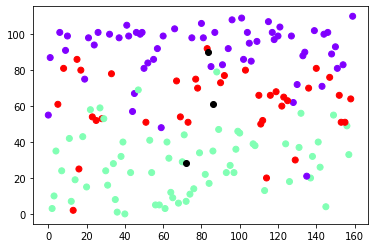

In [51]:
### plotando clusters de Meal, Inexpensive Restaurant (2 coluna)
plt.scatter(df.iloc[:,0],df.iloc[:,1], c=kmeans.labels_, cmap='rainbow')
plt.scatter(kmeans.cluster_centers_[:,0] ,kmeans.cluster_centers_[:,1], color='black')

In [54]:
## y = kmeans.fit_predict(df[['Feat_1', 'Feat_2', 'Feat_3', 'Feat_4']])
y = kmeans.fit_predict(df)

df['Cluster'] = y

df.head()

,local,"Meal, Inexpensive Restaurant","Meal for 2 People, Mid-range Restaurant, Three-course",McMeal at McDonalds (or Equivalent Combo Meal),Domestic Beer (0.5 liter draught),Imported Beer (0.33 liter bottle),Coke/Pepsi (0.33 liter bottle),Water (0.33 liter bottle),"Milk (regular), (1 liter)",Loaf of Fresh White Bread (500g),Eggs (regular) (12),Local Cheese (1kg),Water (1.5 liter bottle),Bottle of Wine (Mid-Range),Domestic Beer (0.5 liter bottle),Imported Beer (0.33 liter bottle),Cigarettes 20 Pack (Marlboro),One-way Ticket (Local Transport),"Chicken Breasts (Boneless, Skinless), (1kg)",Monthly Pass (Regular Price),Gasoline (1 liter),Volkswagen Golf,Apartment (1 bedroom) in City Centre,Apartment (1 bedroom) Outside of Centre,Apartment (3 bedrooms) in City Centre,Apartment (3 bedrooms) Outside of Centre,"Basic (Electricity, Heating, Cooling, Water, Garbage) for 85m2 Apartment",1 min. of Prepaid Mobile Tariff Local (No Discounts or Plans),"Internet (60 Mbps or More, Unlimited Data, Cable/ADSL)","Fitness Club, Monthly Fee for 1 Adult",Tennis Court Rent (1 Hour on Weekend),"Cinema, International Release, 1 Seat",1 Pair of Jeans (Levis 501 Or Similar),"1 Summer Dress in a Chain Store (Zara, H&M, ...)",1 Pair of Nike Running Shoes (Mid-Range),1 Pair of Men Leather Business Shoes,Price per Square Meter to Buy Apartment in City Centre,Price per Square Meter to Buy Apartment Outside of Centre,Average Monthly Net Salary (After Tax),"Mortgage Interest Rate in Percentages (%), Yearly, for 20 Years Fixed-Rate",Taxi Start (Normal Tariff),Taxi 1km (Normal Tariff),Taxi 1hour Waiting (Normal Tariff),Apples (1kg),Oranges (1kg),Potato (1kg),Lettuce (1 head),Cappuccino (regular),"Rice (white), (1kg)",Tomato (1kg),Banana (1kg),Onion (1kg),Beef Round (1kg) (or Equivalent Back Leg Red Meat),Toyota Corolla 1.6l 97kW Comfort (Or Equivalent New Car),"Preschool (or Kindergarten), Full Day, Private, Monthly for 1 Child","International Primary School, Yearly for 1 Child",Cluster
0,119,68,58,36,50,25,33,30,43,34,19,84,32,31,27,53,19,26,39,89,14,63,80,76,81,74,79,2,6,49,117,36,124,123,93,120,80,76,62,115,50,11,36,35,41,25,44,50,24,70,16,12,47,87,105,64,0
1,63,31,12,22,66,47,25,8,17,7,46,27,4,50,75,88,32,16,25,74,43,110,30,27,28,25,33,10,45,41,100,19,22,11,24,19,31,20,31,138,27,28,28,17,11,28,24,45,43,18,76,23,88,106,80,87,1
2,64,12,6,3,52,40,23,6,12,8,38,21,3,35,66,67,24,18,13,49,42,110,15,16,8,8,22,8,39,11,70,2,15,2,13,12,8,8,24,142,16,35,25,12,5,21,20,27,44,12,71,21,72,108,55,58,1
3,57,92,107,91,95,93,114,93,41,98,69,65,75,84,95,105,89,86,126,109,72,96,117,121,116,121,56,6,66,87,138,105,142,64,119,144,137,131,120,0,109,52,134,72,65,46,101,113,79,99,63,57,118,137,94,7,2
4,38,32,28,29,8,4,25,21,14,6,16,44,29,4,18,27,9,0,26,11,38,24,22,28,17,28,88,6,13,54,77,37,79,106,132,109,11,13,7,106,44,4,22,6,39,25,42,10,25,57,49,22,16,31,51,24,1
